

```
Libraries imported
```



In [80]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import *
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [33]:
df = pd.read_excel(r"codon_dataset_final.xlsx")

# df.to_excel('codon_dataset_final.xlsx', index=False)
df

,Kingdom,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8652,4,0.01681,0.03025,0.00336,0.01176,0.01176,0.02689,0.00588,0.05882,0.01345,...,0.00756,0.01261,0.01176,0.01345,0.03697,0.01597,0.03613,0.00084,0.00168,0.00168
8653,4,0.02176,0.04353,0.00450,0.01163,0.00901,0.02627,0.00600,0.04053,0.01576,...,0.00563,0.01013,0.01088,0.01914,0.03452,0.02477,0.05216,0.00038,0.00000,0.00075
8654,4,0.01138,0.02483,0.00241,0.01310,0.01655,0.02845,0.00293,0.04552,0.02000,...,0.00328,0.01241,0.01155,0.01259,0.02086,0.01569,0.03914,0.00052,0.00034,0.00155
8655,4,0.02270,0.01079,0.01191,0.01662,0.01240,0.00670,0.00521,0.01377,0.02493,...,0.00360,0.01898,0.00558,0.04478,0.01526,0.04317,0.02444,0.00136,0.00012,0.00112


In [75]:
df['Kingdom'].unique()

array([0, 1, 2, 3, 4])

In [104]:
scaler = StandardScaler()
mxscaler = MinMaxScaler()
features = pd.DataFrame(mxscaler.fit_transform(df),columns=df.columns)

In [105]:
# pca = PCA(2)
# x = pca.fit_transform(df)
x = features.iloc[:,1:].values
print(x.shape)
x

(8657, 64)


array([[0.19099307, 0.16204203, 0.00552853, ..., 0.05553097, 0.03521127,
        0.        ],
       [0.31339492, 0.18278556, 0.0075188 , ..., 0.05995575, 0.04788732,
        0.        ],
       [0.22794457, 0.29364224, 0.15004423, ..., 0.08650442, 0.        ,
        0.04343891],
       ...,
       [0.13140878, 0.33445582, 0.0266475 , ..., 0.01150442, 0.02394366,
        0.04675716],
       [0.26212471, 0.14533944, 0.13168952, ..., 0.0300885 , 0.0084507 ,
        0.03378582],
       [0.19237875, 0.39291487, 0.05185759, ..., 0.01327434, 0.02746479,
        0.04343891]])

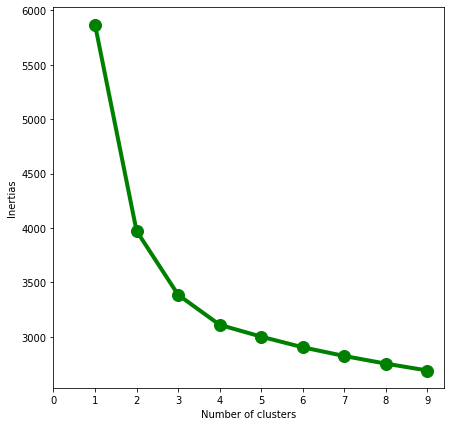

In [106]:
# find the optimal number of clusters using elbow method
inertias = []; klimit=10
for i in range(1,klimit):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    inertias.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,klimit),inertias, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(klimit))
plt.xlabel("Number of clusters")
plt.ylabel("Inertias")
plt.show()

2 4130.49816289707


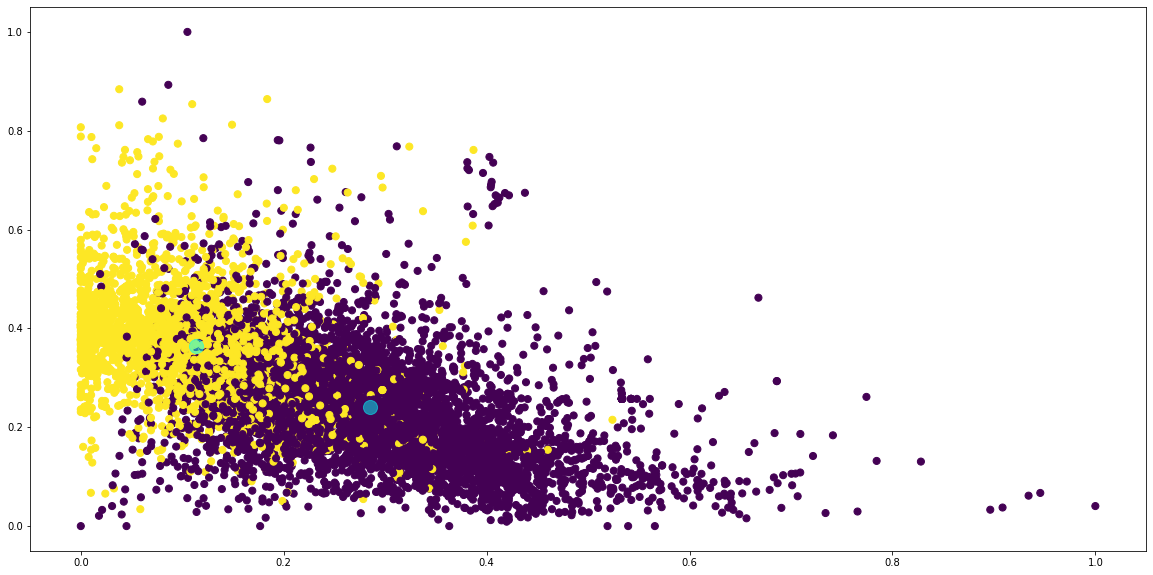

3 3172.4379101327054


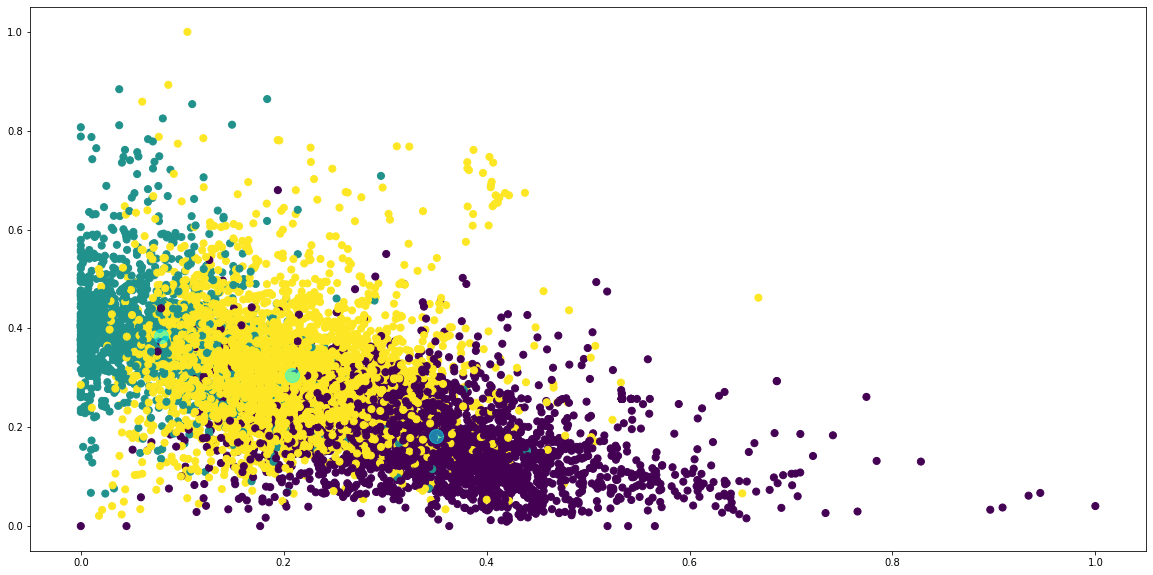

4 2558.67691289272


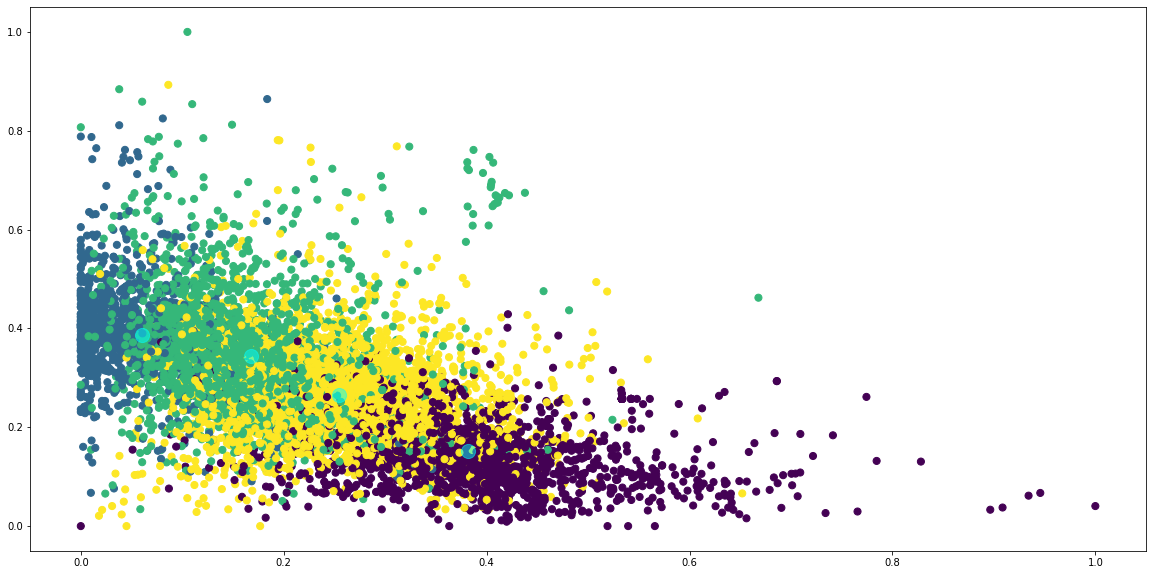

5 2066.7930300947137


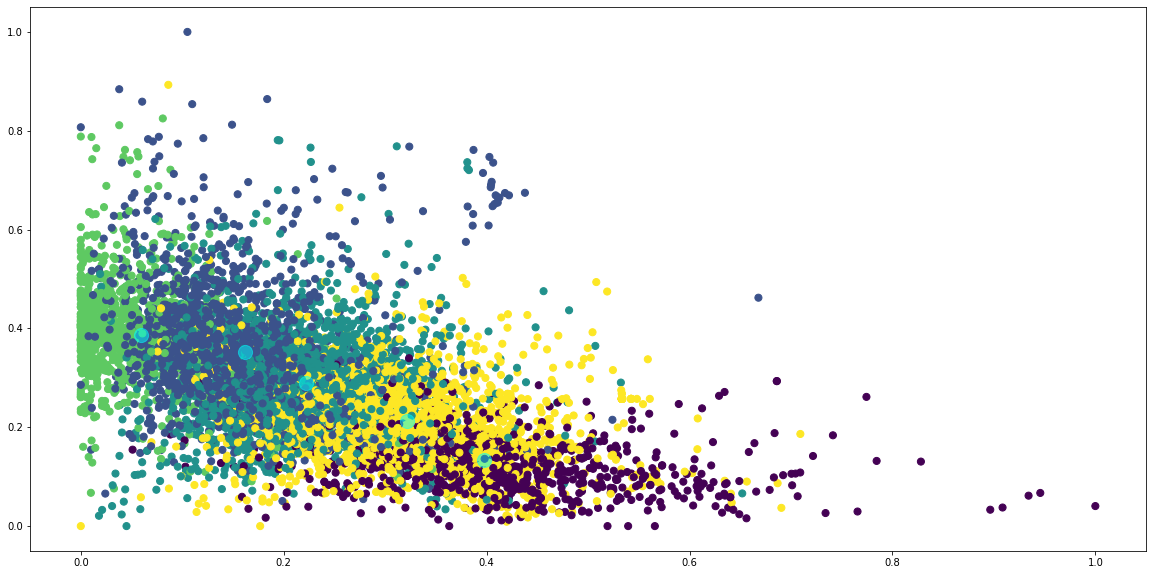

6 1766.8901988925663


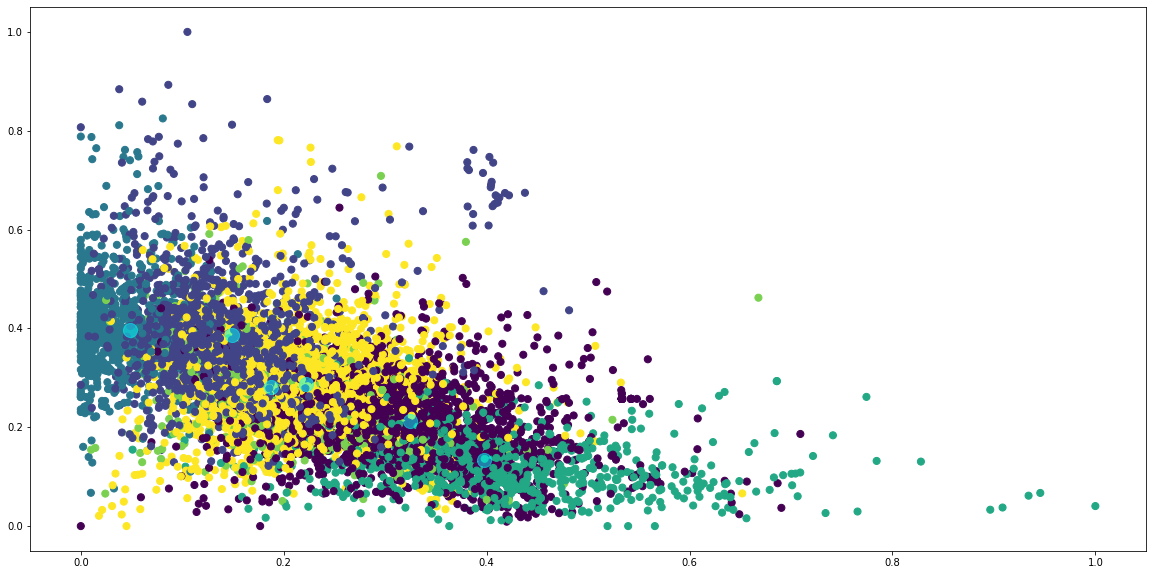

7 1554.9848732673274


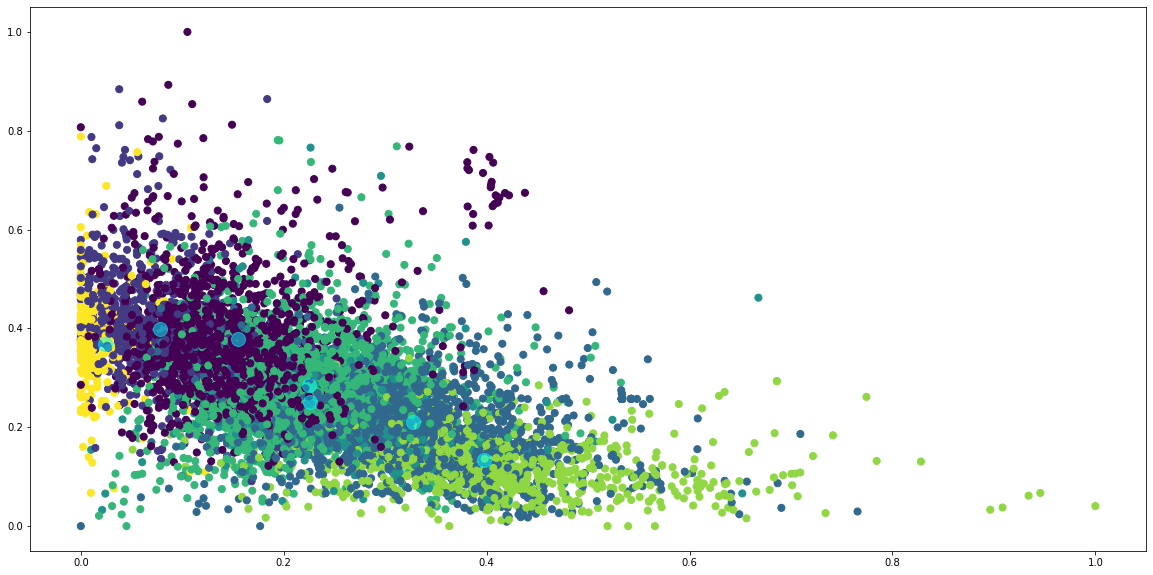

8 1396.0687219478739


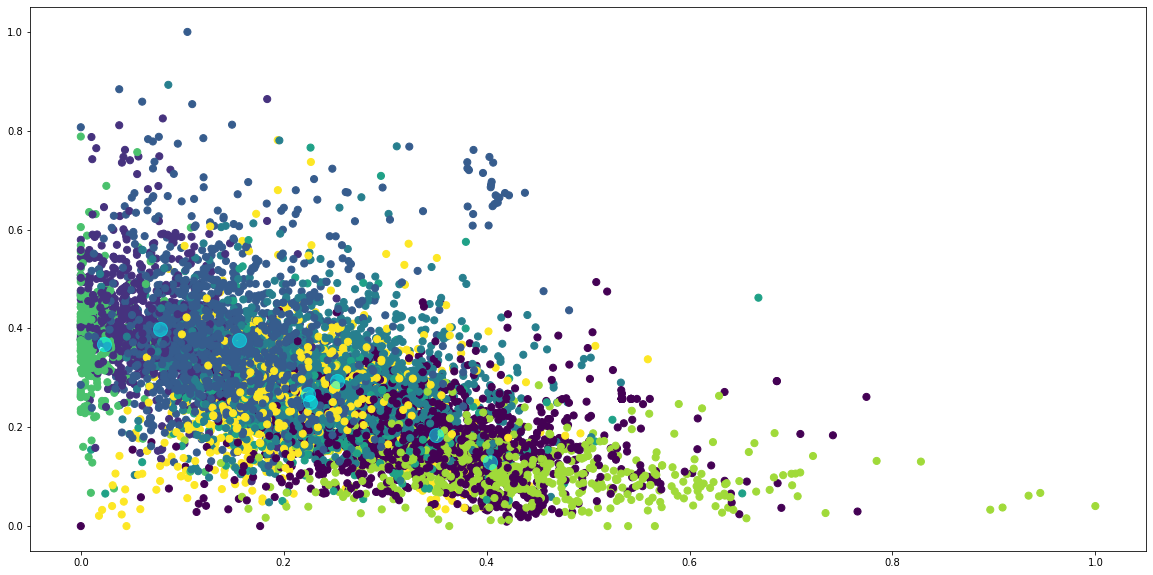

9 1278.3976356105181


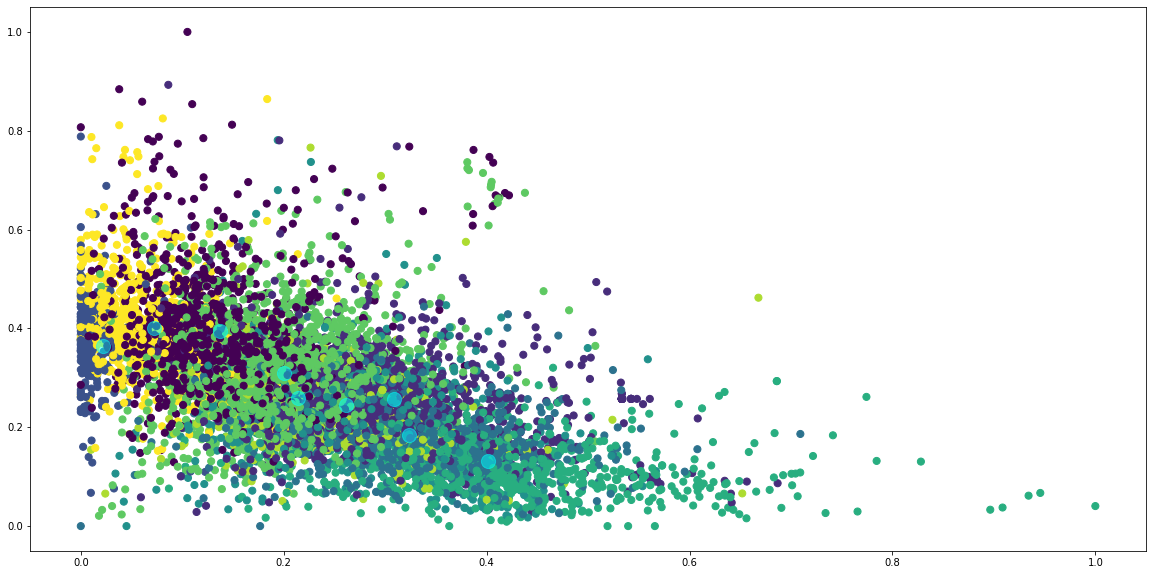

In [107]:
#plotting with cluster 2 to 10
for i in range(2,10):
  model = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 5)
  y_clusters = model.fit_predict(x)
  labels = model.labels_
  print(i, metrics.calinski_harabasz_score(x, labels))
  plt.figure(figsize = (20,10))
  plt.scatter(x[:, 0], x[:, 1], c= y_clusters, s=50, cmap='viridis')

  centers = model.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=200, alpha=0.5);
  # plt.legend()
  plt.show()

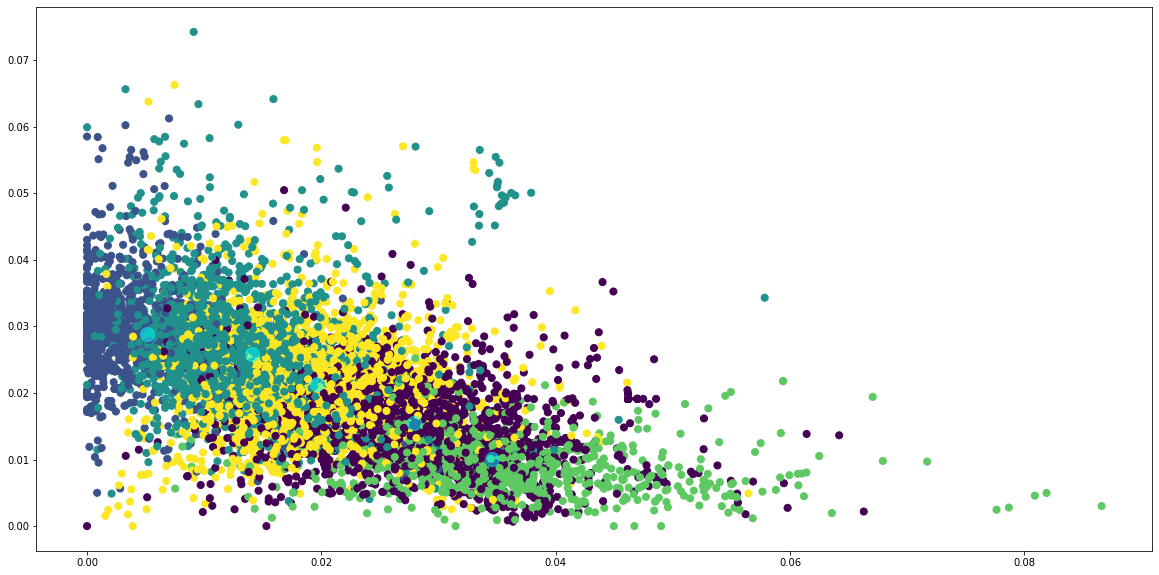

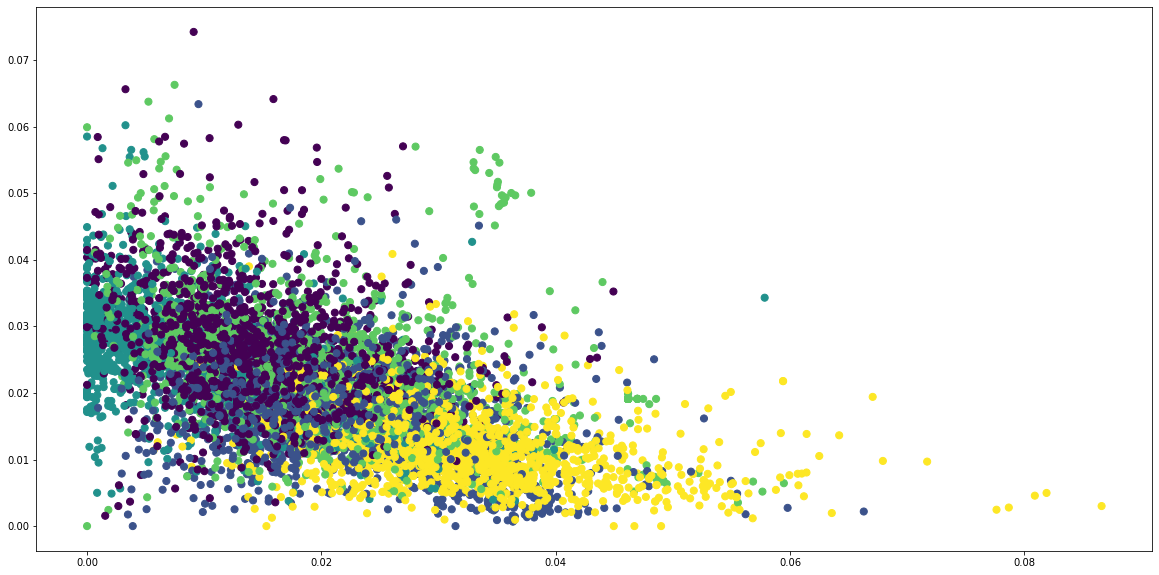

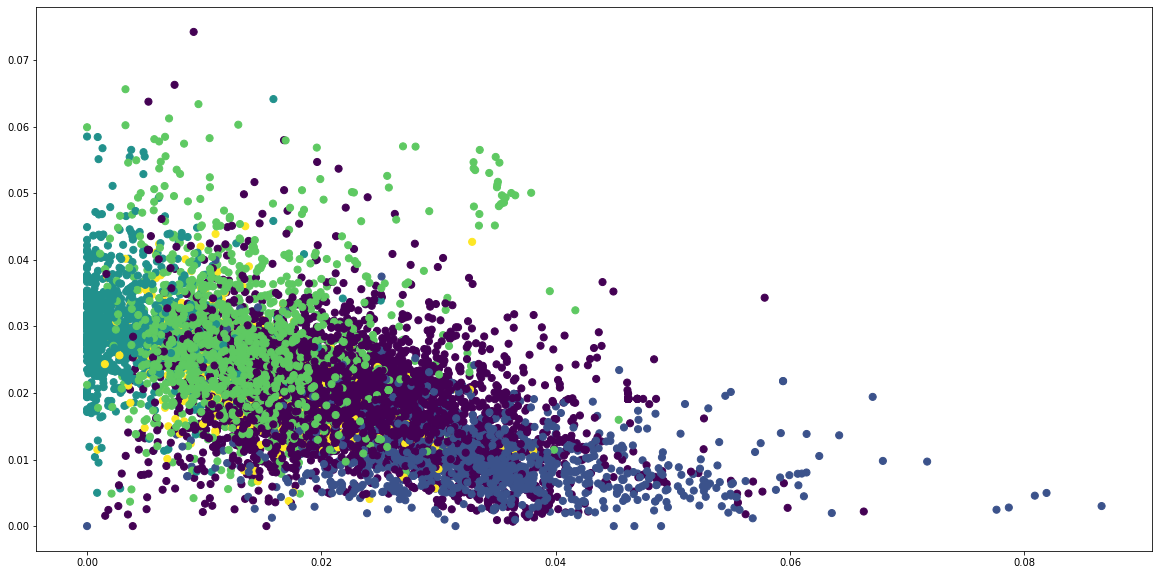

In [98]:
clustering_algorithms = [
    KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 5),
    SpectralClustering(n_clusters=5,assign_labels='discretize', random_state=0),
    AgglomerativeClustering(n_clusters=5),
]

eval_metrics = {
    'model':['kmeans','spectral','aggloclust'],
    'calinski harabasz score':[],
    'davies bouldin score':[],
    'silhouette score':[]
}

for model_ in clustering_algorithms:
  y_clusters = model_.fit_predict(x)
  labels = model_.labels_
  try:
    centers = model_.cluster_centers_
  except:
    centers=[]
  #Evaluation metrics
  eval_metrics['calinski harabasz score'].append(metrics.calinski_harabasz_score(x, labels) )
  eval_metrics['davies bouldin score'].append(metrics.davies_bouldin_score(x, labels) )
  eval_metrics['silhouette score'].append(metrics.silhouette_score(x, labels, metric='euclidean') )

  plt.figure(figsize = (20,10))
  plt.scatter(x[:, 0], x[:, 1], c= y_clusters, s=50, cmap='viridis')
  # print(centers)
  if len(centers)>0:
    plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=200, alpha=0.5);
  plt.show()

In [102]:
eval_metricsf = pd.DataFrame(eval_metrics, columns= eval_metrics.keys())
eval_metricsf

,model,calinski harabasz score,davies bouldin score,silhouette score
0,kmeans,2268.487281,2.157803,0.119871
1,spectral,1478.843625,2.549360,0.090372
2,aggloclust,2029.603703,1.910959,0.127523


**calinski harabasz score** : The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**davies bouldin score**: Zero is the lowest possible score. Values closer to zero indicate a better partition.

**silhouette score**: The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.




**Q4. Are there any parameters in the clustering method you used?**

kmeans is used as first clustering algorithm in this study. Parameters used where n_clusters, init as "k-means++", max_iter = 300, n_init = 10, and random_state = 5

**How did you select them, and what happens if you select alternative values (e.g. what if you tell it to look for more or fewer clusters than there should be)?**

n_clusters clusters where checked for value 1 to 100. It was found that at n_clusters = 4 the performance doesnt change significantly for the kmeans model where all predictors are selected.
As from these results it signifies that model suggest for fewer cluaters than the expected no of 5 clusters from the dataset labels for kingdom. Because original dataset had 5 labels from 0 to 4. 


**Q5. Calculate the Silhouette Index and the Calinski-Harabaz Index and report them. Are they indicative of a well-distributed or poorly-distributed dataset?**

All clustering algorithms available in sklearn cluster package were tried on this codon dataset. Out of which only three converged of whom the scores are calculated.
Kmeans and Agglomerative Clustering gave better Calinski-Harabaz score on the dataset as compared to Spectral clusterimg algorithm. 

As for the Silhouette Index similar performace is observed among theses algorithms. Agglomerative Clustering has higher score over the other two algorithms. All of these models are trained to give out 5 clusters since number of lavels in original dataset is three.

These score seems to detoriate as number of clusters asked are increased from 2 and above